# Garments Project (by: The Guo Family)

Garmets are worn every day by humans around the world. From the famous and highly sought after fashion houses such as the Haus of Gucci, Louis Vitton, Dior, down to the smaller fashion labels, humans have the tendency to buy what is on the shelf. But, behind all the garments that are sold on a day to day basis, what goes behind the scenes? In this project, we want to look at the reasoning between the overtime that happens in this current fashion house together with making three (3) models to predict the number of overtime that will happen in the future.

In [37]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
import os

In [38]:
df = pd.read_csv('garments.csv') # Importing garments.csv file to a pandas dataframe

After importing the dataset into the dataframe, we now look for errors and see what can we do for null cells.

In [39]:
# Dataset structure
print(df.info())  # Column names, data types, and non-null counts
print(df.describe())  # Statistics for numeric columns
print(df.head())  # Preview the first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

We see that there are null values in the WIP column, highlighted in the figure below:

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


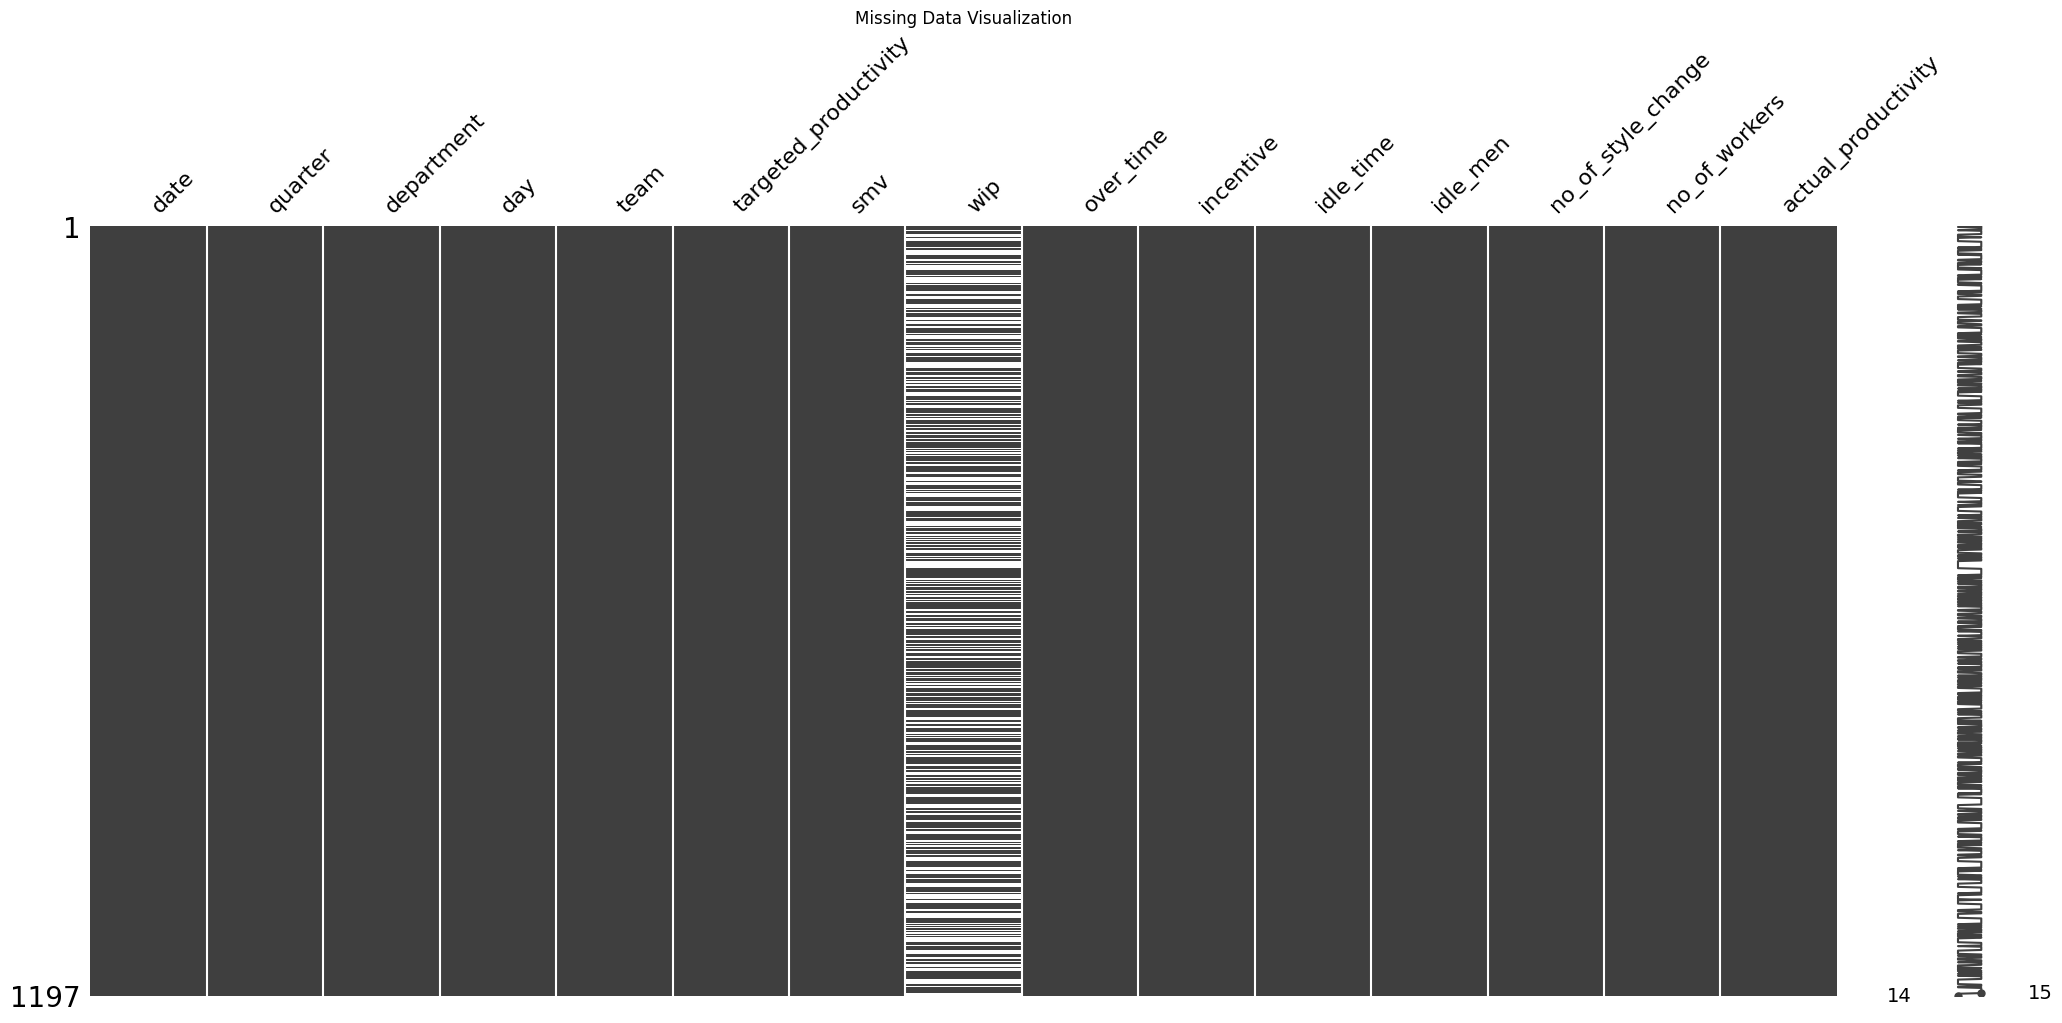

In [40]:
# Count missing values per column
print(df.isnull().sum())

# Visualize missing data
msno.matrix(df)
plt.title('Missing Data Visualization')
plt.show()

The team chose to replace empty cells with zero. This is doable since WIP stands for "work in progress" if the cell is null, it means that there are no projects that are "work in progress", making them null.

In [41]:
# Replace NaN values with 0
df = df.fillna(0)

# Replace empty strings with 0
df = df.replace('', 0)

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


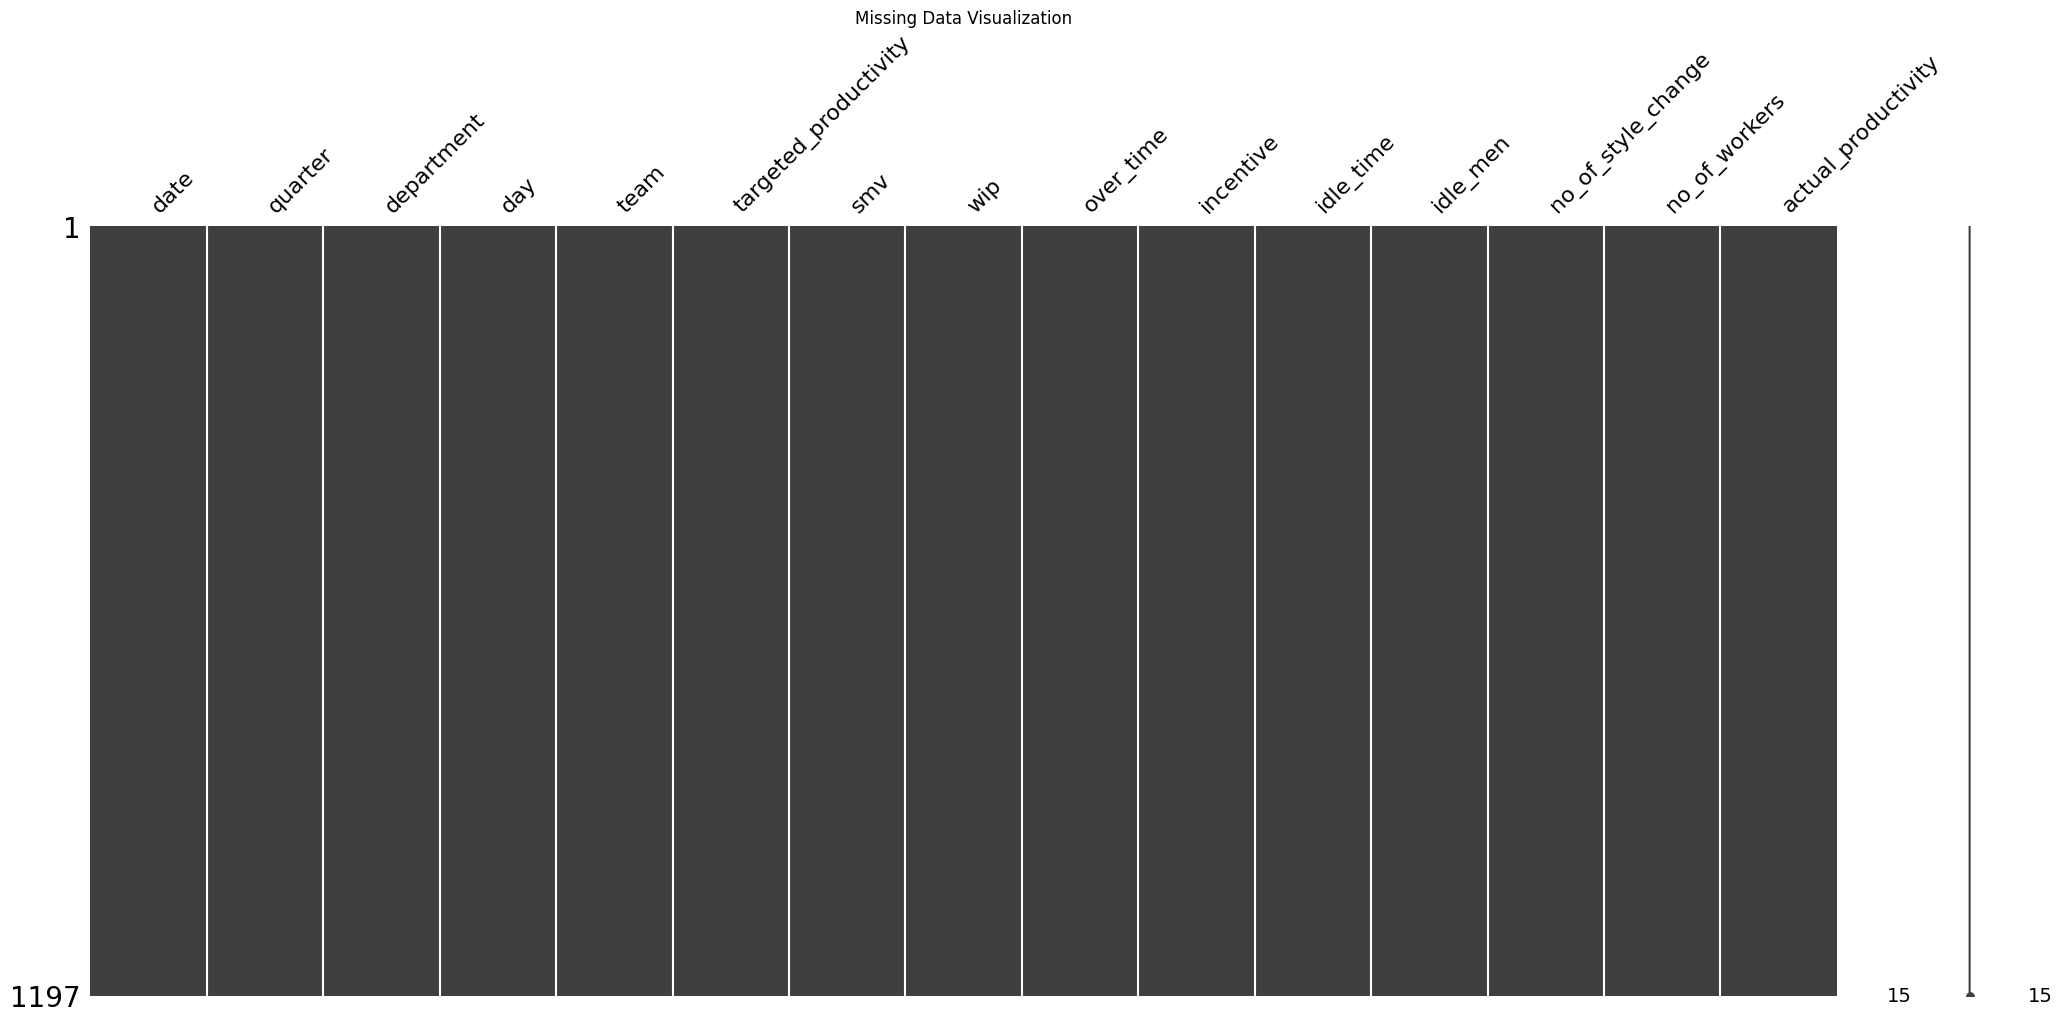

In [42]:
# Count missing values per column
print(df.isnull().sum())

# Visualize missing data
msno.matrix(df)
plt.title('Missing Data Visualization')
plt.show()

Here we're making sure that the dataset does not have any more null cells.

Afterwards, we normalize the values to make sure that all numerical features have the same impact on the model.

In [43]:
over_time = df['over_time']

true_numeric_columns = ['over_time', 'smv', 'wip', 'incentive', 'idle_time', 'idle_men', 
                        'no_of_style_change', 'no_of_workers']
numeric_columns = df[true_numeric_columns]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the numeric columns and update the DataFrame
df[numeric_columns.columns] = scaler.fit_transform(numeric_columns)
df['unscalled_over_time'] = over_time

After normalizing the values, we move on to adding some columns to help with parsing through data.

In [44]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.month  # Extract the month

Finally, we move on to looking at the data itself and see what does it mean to this certain fashion haus.

# Exploring the data

Firstly, we look at the distribution of each numerical data and see what it means to the data itself.

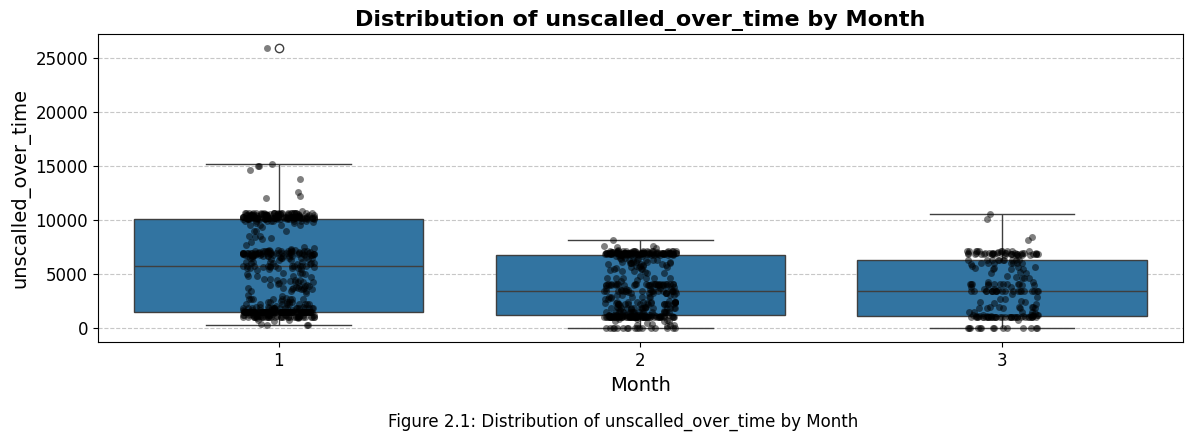

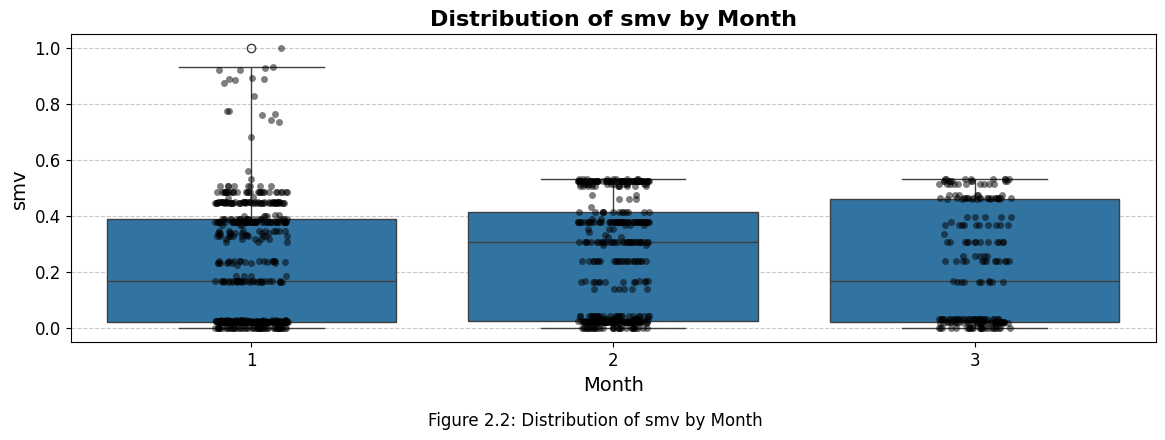

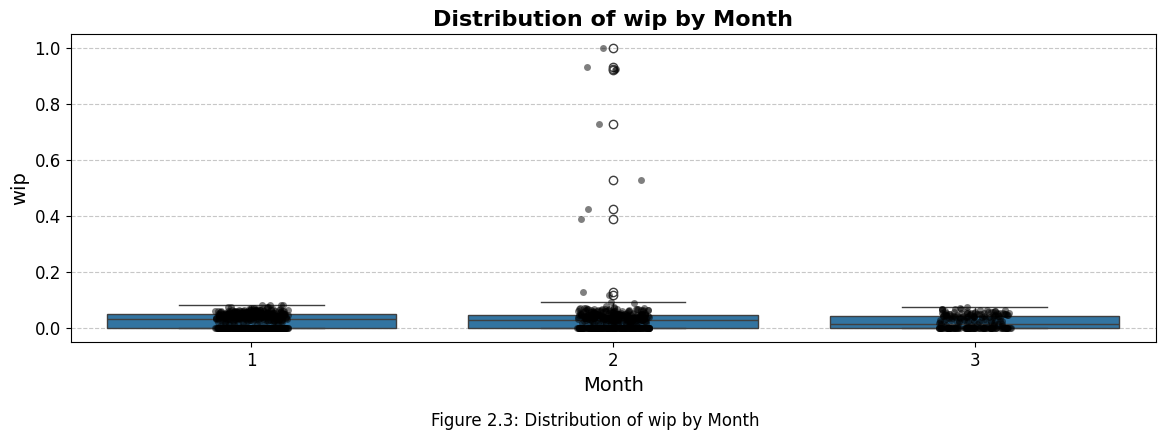

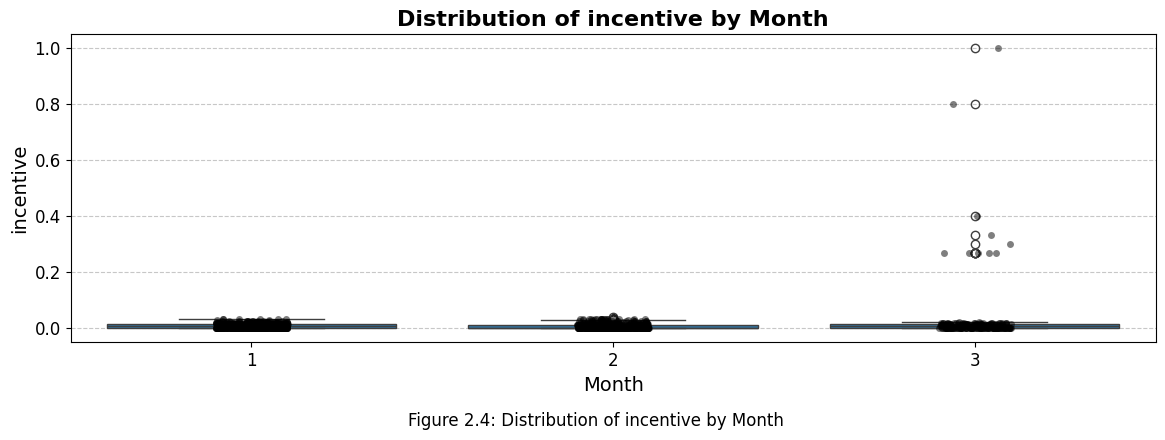

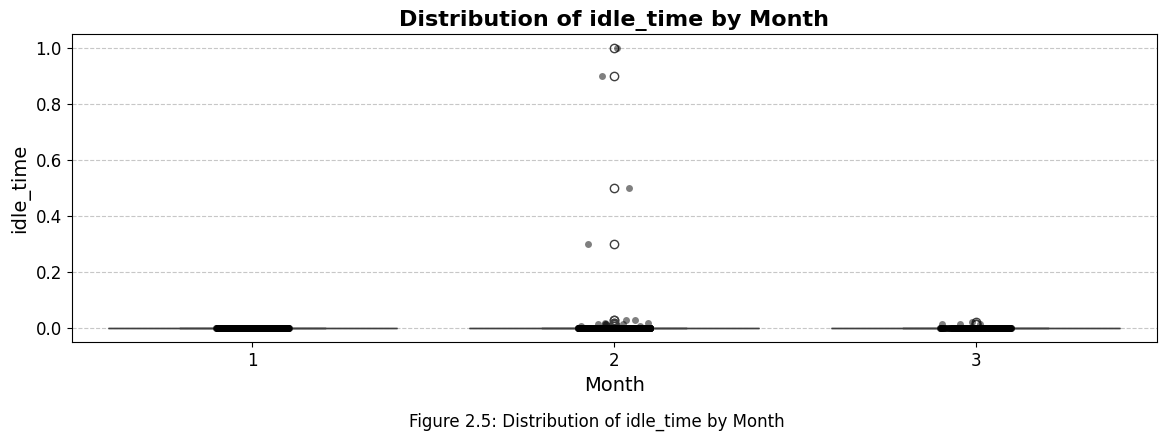

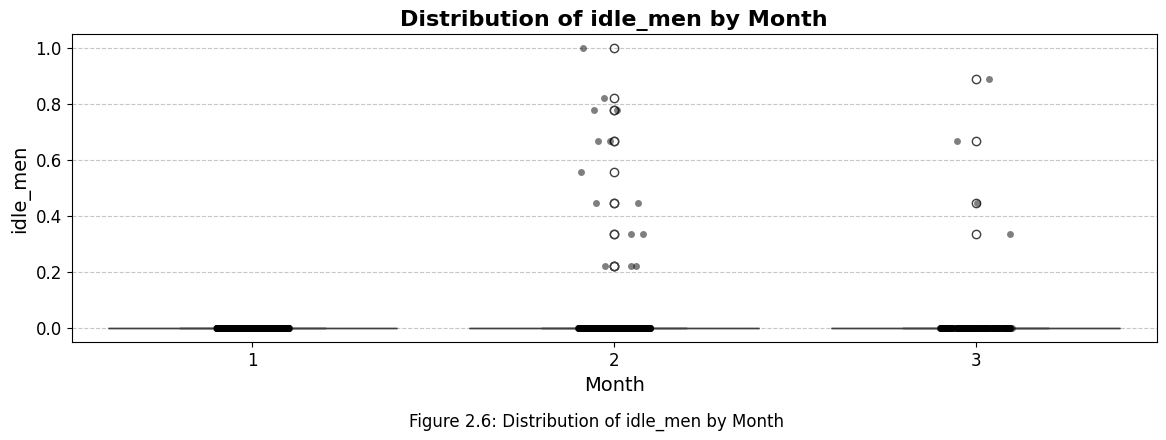

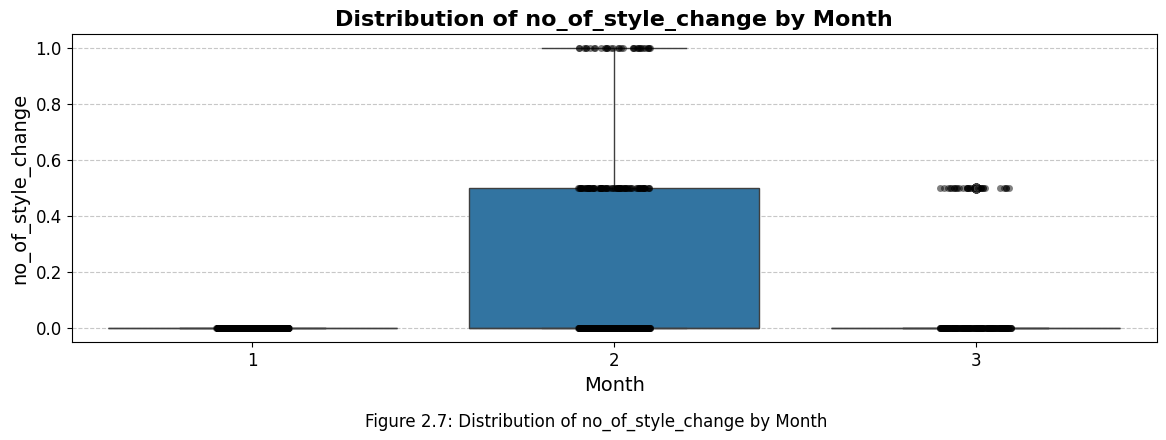

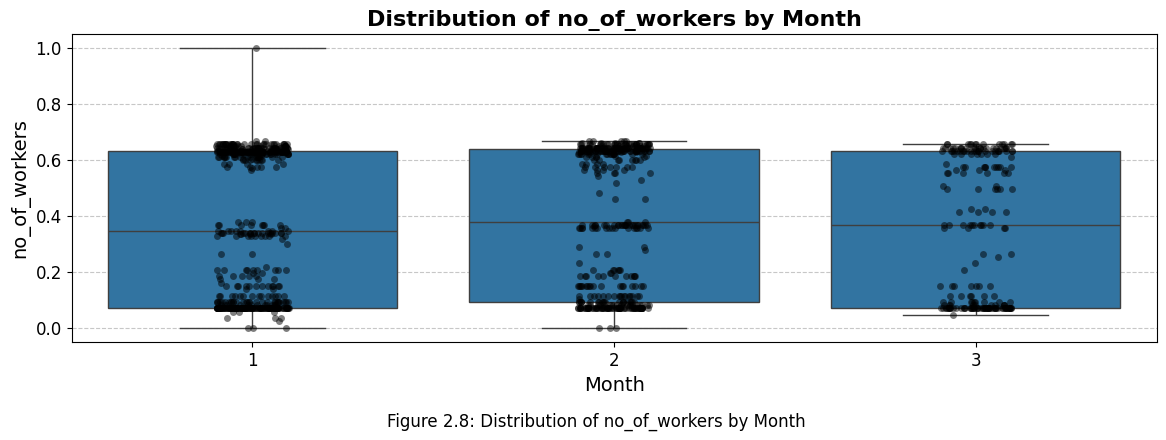

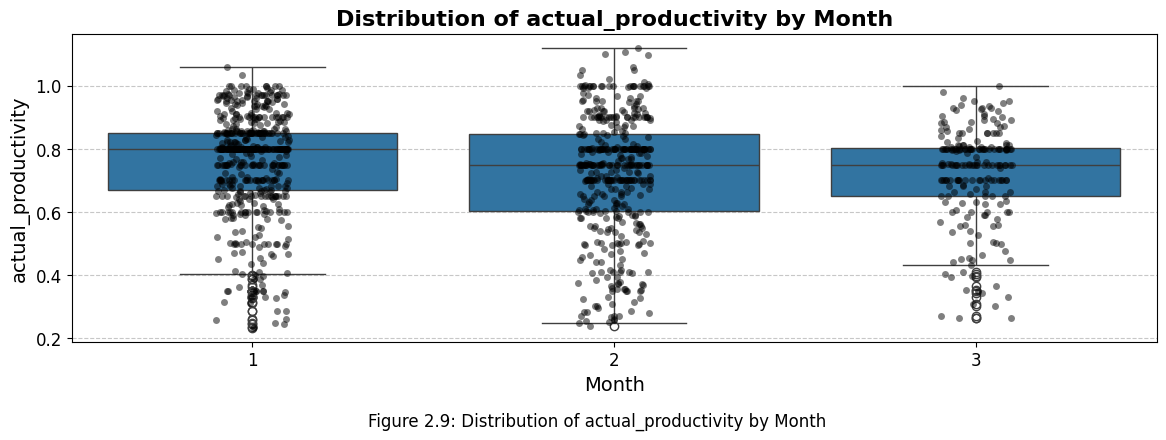

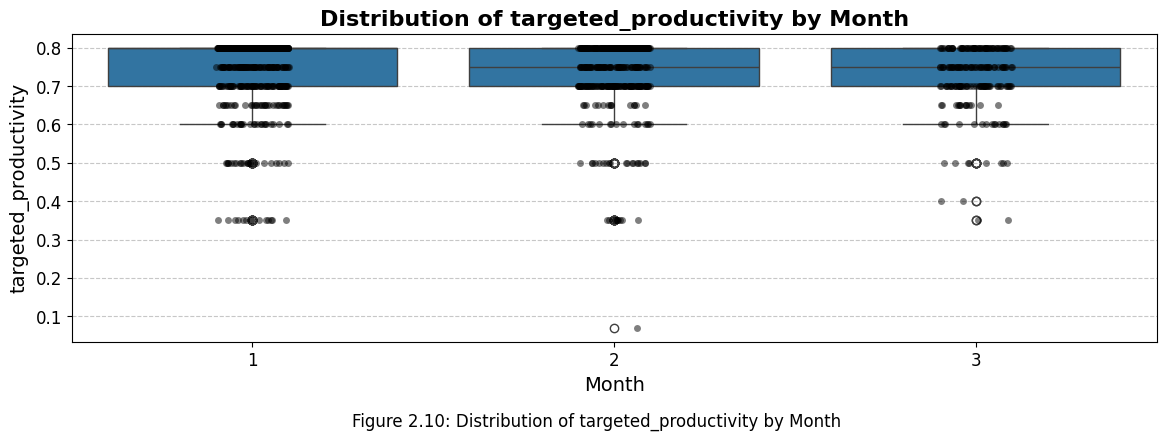

In [45]:
true_numeric_columns = ['unscalled_over_time', 'smv', 'wip', 'incentive', 'idle_time', 'idle_men', 
                        'no_of_style_change', 'no_of_workers', 'actual_productivity', 'targeted_productivity']

# Ensure output directory exists
output_dir = "figures"
os.makedirs(output_dir, exist_ok=True)

# Starting figure number
figure_number = 2.1

# Starting figure number
major_figure_number = 2  # Represents the major part (e.g., 2.x)
minor_figure_number = 1  # Represents the minor part (e.g., x.1)

# Visualize distributions of numeric columns
for col in true_numeric_columns:
    figure_number = f"{major_figure_number}.{minor_figure_number}" # Combine major and minor figure numbers for the filename
    plt.figure(figsize=(14, 4))  # Adjust figure size
    sns.boxplot(x='month', y=col, data=df, showfliers=True)  # Boxplot
    sns.stripplot(x='month', y=col, data=df, color='black', alpha=0.5, jitter=0.1, dodge=False)  # Reduced jitter
    plt.title(f'Distribution of {col} by Month', fontsize=16, fontweight='bold')  # Title
    plt.xlabel('Month', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
    plt.figtext(0.5, -0.1, f"Figure {figure_number}: Distribution of {col} by Month", ha='center', fontsize=12) # Add figure label as a caption
    
    
    figure_filename = os.path.join(output_dir, f"Figure_{figure_number}.png")
    plt.savefig(figure_filename, bbox_inches='tight')
    
    # Increment the minor figure number
    minor_figure_number += 1
    
    plt.show()


As shown in Figure 2.1, it shows the distribution of over time per month. The chart shows different patterns in overtime hours over three months. In Month 1, the median overtime is higher and more varied than in Months 2 and 3. This might mean there's a seasonal pattern, like a busy time with more work or production, possibly due to certain needs or deadlines. Also, some extreme values in Month 1, almost reaching the highest possible overtime of 1.0, could be due to unusual events, like sudden staff shortages or urgent project needs, causing some workers or days to have much higher overtime.

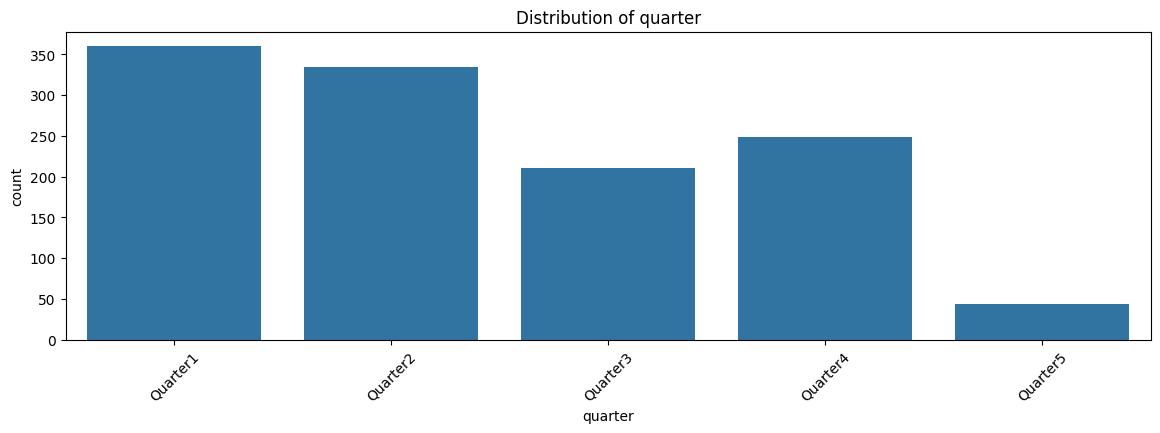

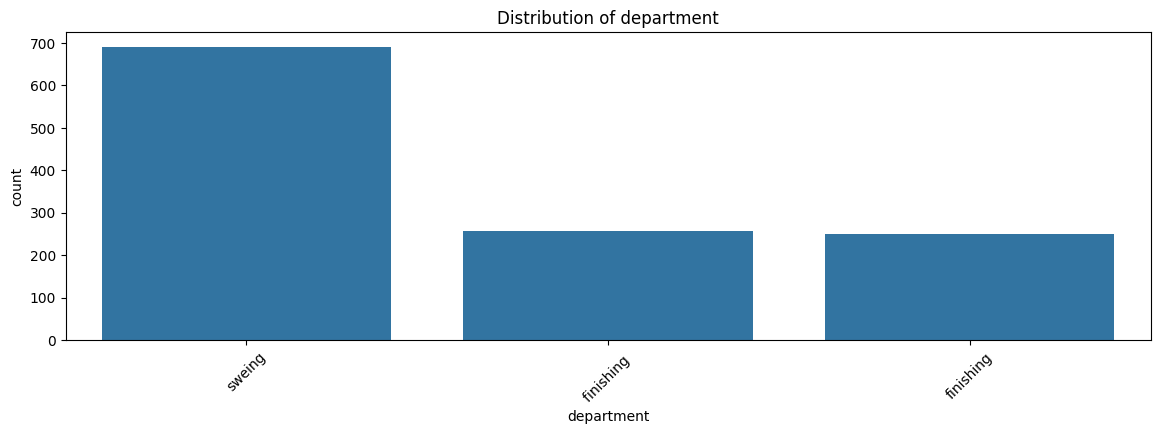

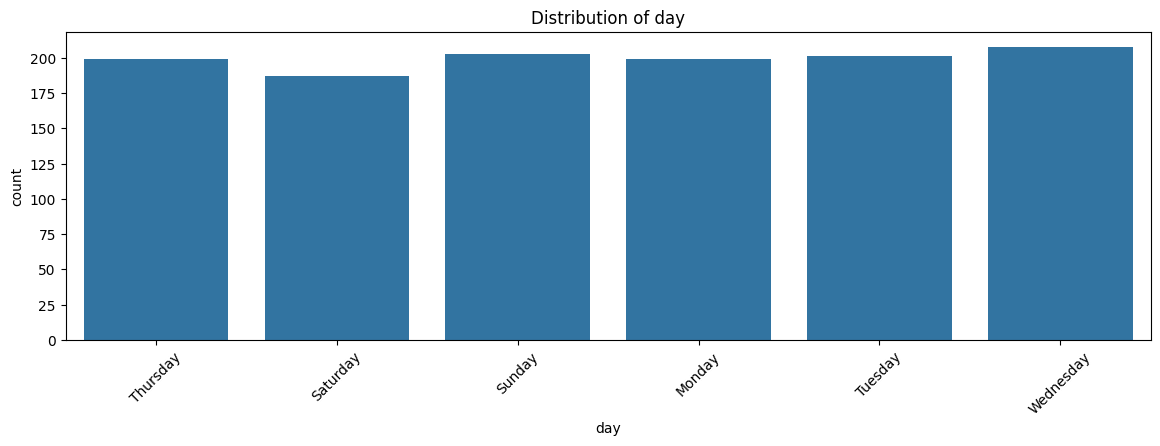

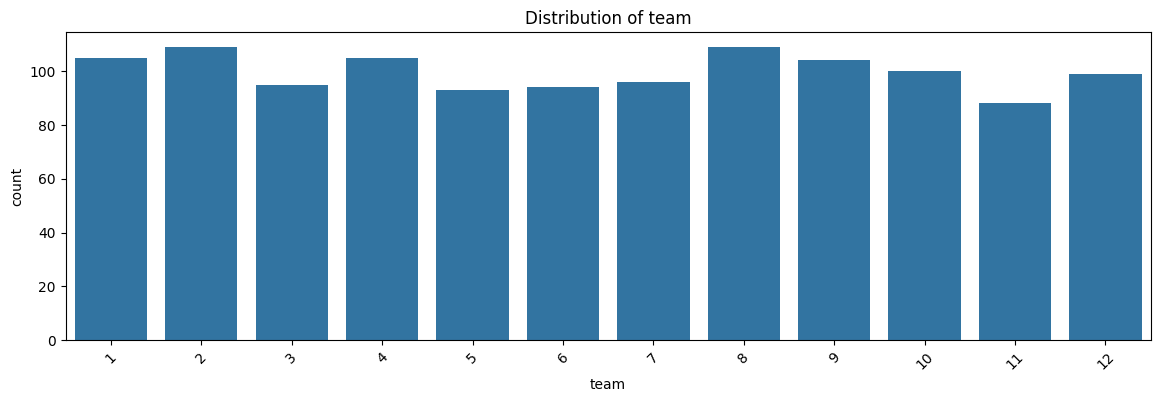

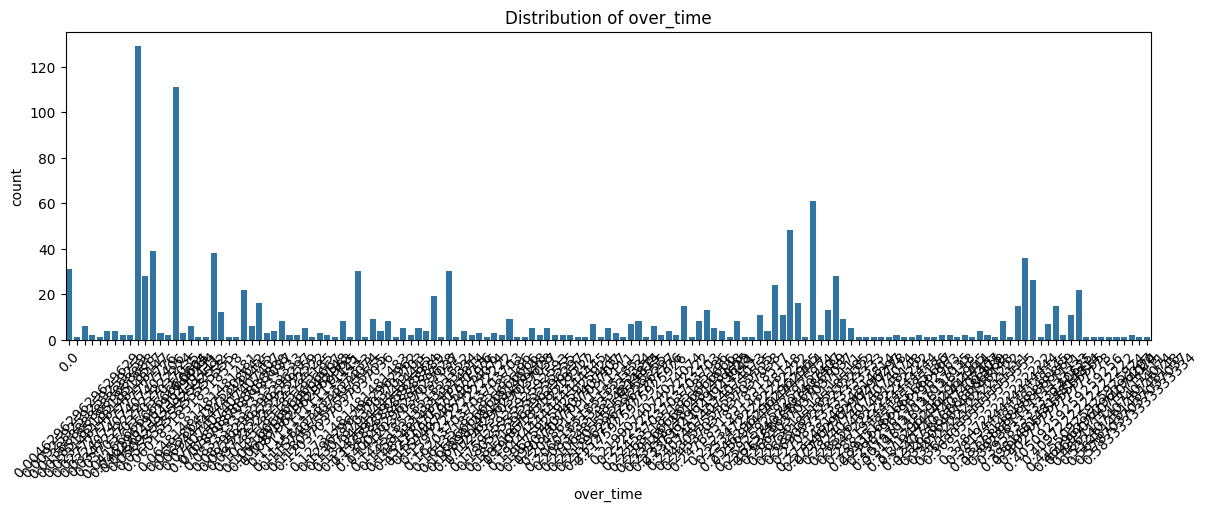

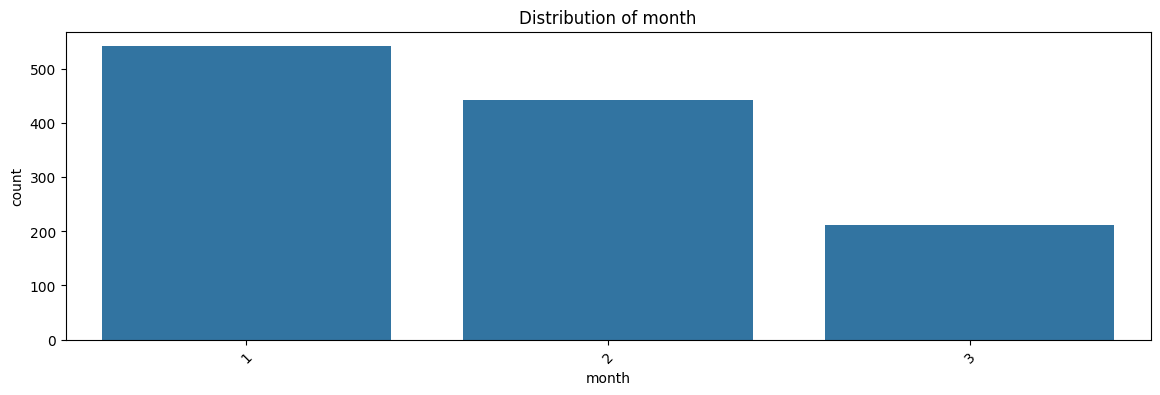

In [46]:
# Create a list of columns excluding the true numeric ones
remaining_columns = [col for col in df.columns if col not in true_numeric_columns and col != 'date']

# Filter the remaining categorical columns (assuming they're not numeric)
categorical_columns = df[remaining_columns]

# Check unique values and distributions for the remaining categorical features
for col in categorical_columns:
    plt.figure(figsize=(14, 4))  # Width: 14 inches, Height: 8 inches
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

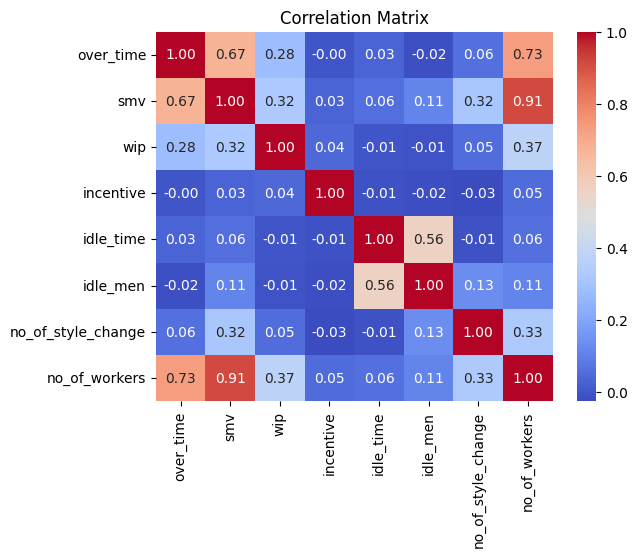

Correlation with Overtime:
 over_time             1.000000
no_of_workers         0.734164
smv                   0.674887
wip                   0.276529
no_of_style_change    0.059790
idle_time             0.031038
incentive            -0.004793
idle_men             -0.017913
Name: over_time, dtype: float64


In [47]:
# Correlation matrix
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Correlations with 'over_time'
correlation_with_overtime = numeric_columns.corr()['over_time'].sort_values(ascending=False)
print("Correlation with Overtime:\n", correlation_with_overtime)


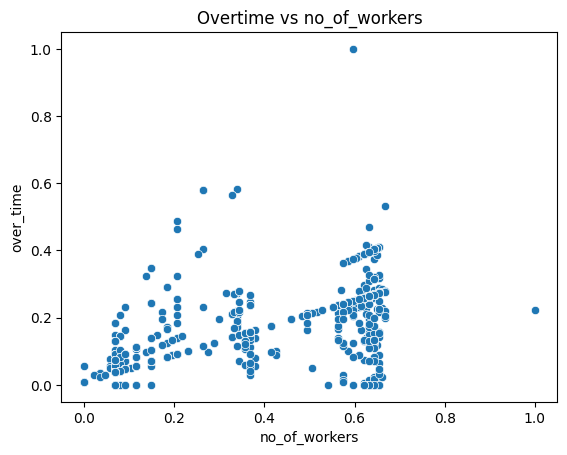

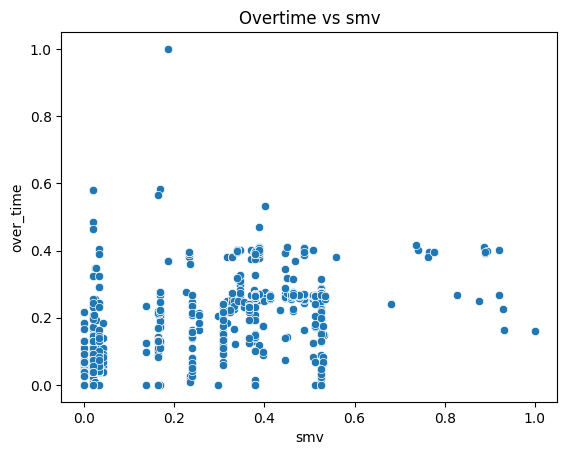

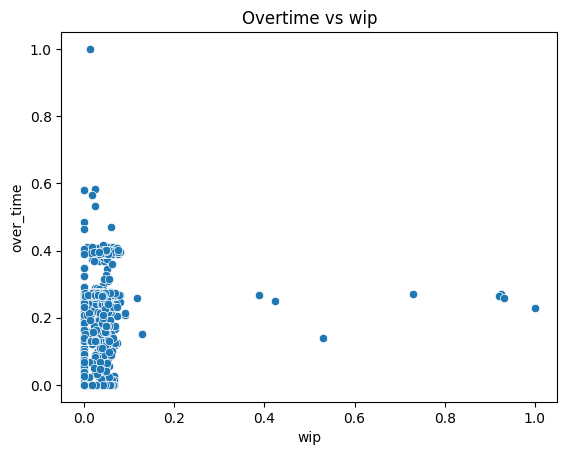

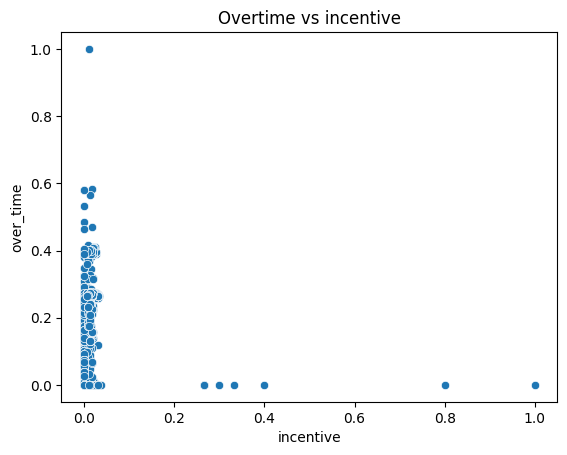

In [48]:
# Scatterplots for numeric columns
for col in ['no_of_workers', 'smv', 'wip', 'incentive']:
    sns.scatterplot(x=col, y='over_time', data=df)
    plt.title(f'Overtime vs {col}')
    plt.show()


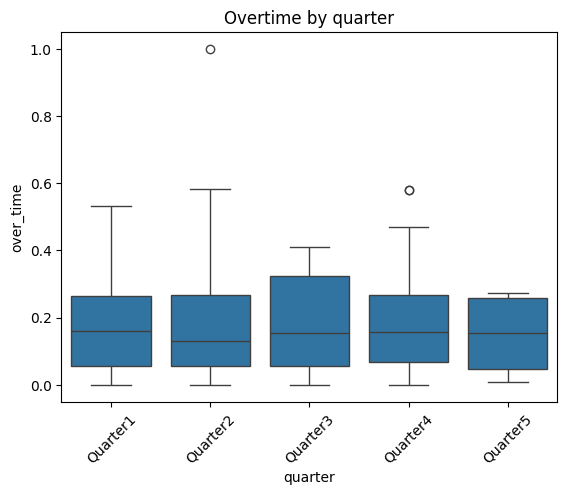

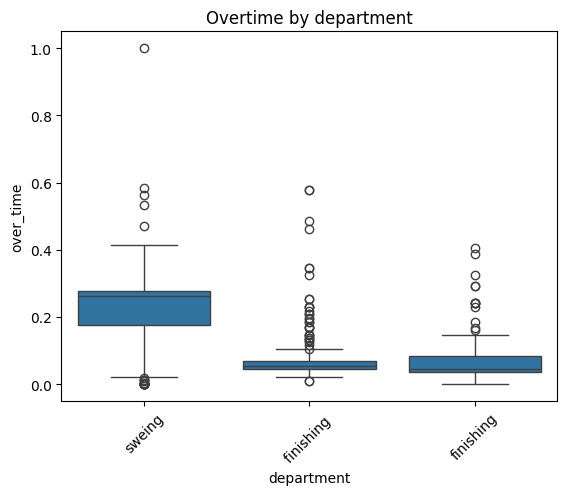

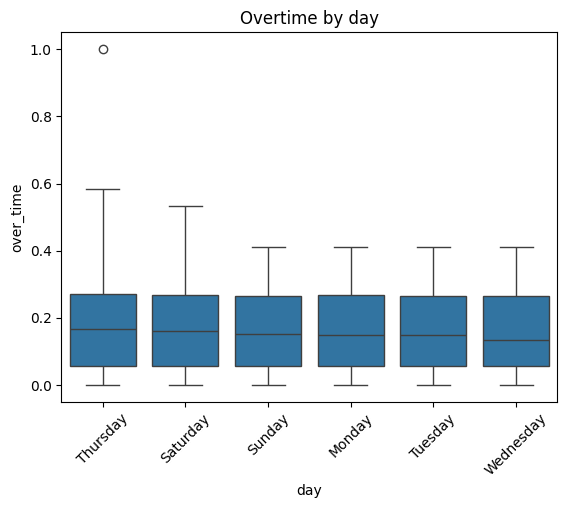

In [49]:
# Boxplots for categorical features
for col in ['quarter', 'department', 'day']:
    sns.boxplot(x=col, y='over_time', data=df)
    plt.title(f'Overtime by {col}')
    plt.xticks(rotation=45)
    plt.show()


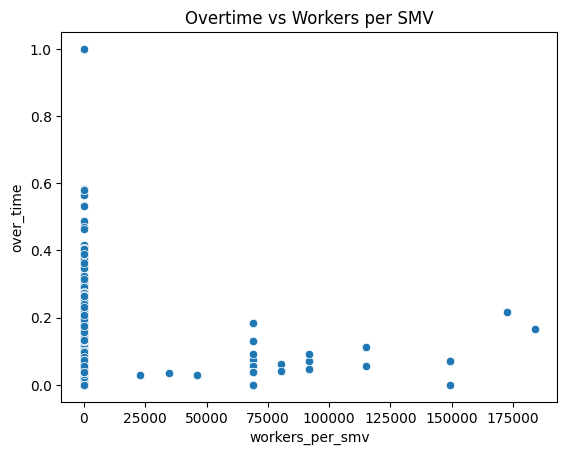

         over_time           targeted_productivity actual_productivity
              mean       std                  mean                mean
quarter                                                               
Quarter1  0.172875  0.111714              0.744083            0.751560
Quarter2  0.168018  0.140886              0.732090            0.743710
Quarter3  0.188889  0.140572              0.721190            0.704759
Quarter4  0.187162  0.129010              0.714516            0.709067
Quarter5  0.143729  0.105291              0.718182            0.826177


In [50]:
# Interaction terms (e.g., workers_per_smv)
df['workers_per_smv'] = df['no_of_workers'] / (df['smv'] + 1e-6)
sns.scatterplot(x='workers_per_smv', y='over_time', data=df)
plt.title('Overtime vs Workers per SMV')
plt.show()

# Group-Wise Analysis
grouped = df.groupby('quarter').agg({
    'over_time': ['mean', 'std'],
    'targeted_productivity': ['mean'],
    'actual_productivity': ['mean']
})
print(grouped)


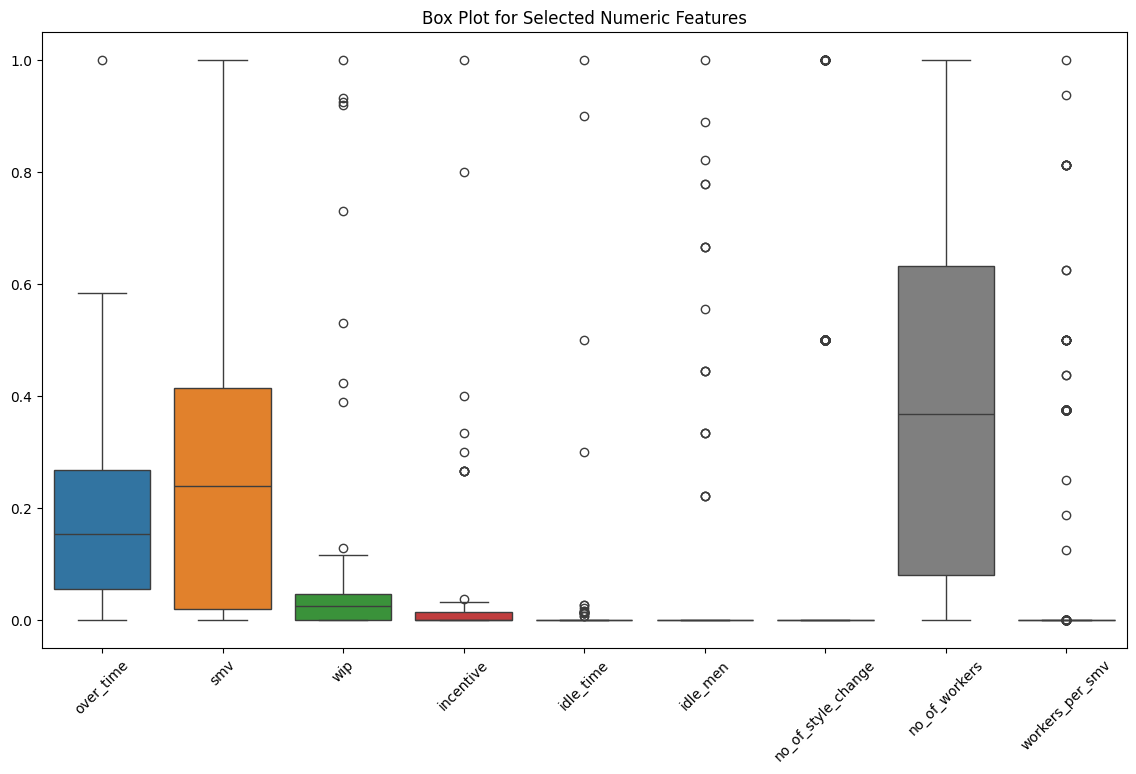

Outliers:
           date   quarter  department       day  team  targeted_productivity  \
138 2015-01-08  Quarter2      sweing  Thursday    12                   0.80   
139 2015-01-08  Quarter2      sweing  Thursday     6                   0.80   
146 2015-01-08  Quarter2      sweing  Thursday    11                   0.35   
383 2015-01-22  Quarter4  finishing   Thursday     1                   0.70   
384 2015-01-22  Quarter4  finishing   Thursday     2                   0.70   

          smv       wip  over_time  incentive  idle_time  idle_men  \
138  0.168602  0.023700   0.583333   0.017500        0.0       0.0   
139  0.164731  0.017775   0.564815   0.013889        0.0       0.0   
146  0.186218  0.012412   1.000000   0.010556        0.0       0.0   
383  0.020132  0.000000   0.578704   0.000000        0.0       0.0   
384  0.020132  0.000000   0.578704   0.000000        0.0       0.0   

     no_of_style_change  no_of_workers  actual_productivity  \
138                 0.0       

In [51]:
# Normalize the 'workers_per_smv' column
df['workers_per_smv'] = scaler.fit_transform(df[['workers_per_smv']])

# Define the columns to include in the boxplot
selected_columns = ['over_time', 'smv', 'wip', 'incentive', 'idle_time', 'idle_men', 
                    'no_of_style_change', 'no_of_workers', 'workers_per_smv']

# Boxplot for selected numeric features
plt.figure(figsize=(14, 8))  # Width: 14 inches, Height: 8 inches
sns.boxplot(data=df[selected_columns])  # Use only the selected columns
plt.title('Box Plot for Selected Numeric Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Z-score method for outlier detection
df['z_score'] = zscore(df['over_time'])
outliers = df[df['z_score'].abs() > 3]
print("Outliers:\n", outliers)


C:\Users\user\AppData\Local\Temp\ipykernel_26724\2967914280.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['over_time'].resample('M').mean().plot()


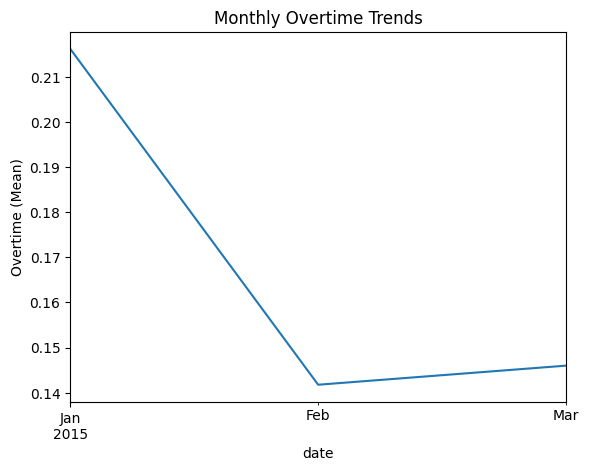

In [52]:
# Trends over time
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df['over_time'].resample('M').mean().plot()
plt.title('Monthly Overtime Trends')
plt.ylabel('Overtime (Mean)')
plt.show()


In [53]:
#Small Cleaning
finish = ["finishing ", "finishing"]
df.loc[df.department.isin(finish), "department"] = 'finishing'

In [54]:
df['categorical_over_time'] = df['unscalled_over_time']//60

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing   

In [56]:
def compute_mse(predictions, actual):
    return np.square(predictions-actual).mean()

def compute_accuracy(predictions, actual):
    return sum(predictions==actual)/len(actual) * 100

In [57]:
df.keys()

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'unscalled_over_time', 'month', 'workers_per_smv', 'z_score',
       'categorical_over_time'],
      dtype='object')

In [58]:
dt_df = df.iloc[:,[
                0, #quarter
                1, #department
#                2, #day
                3, #team
                4, #targeted_productivity
                5, #smv
                6, #wip
                8, #incentive
                9, #idle_time
                10, #idle_men
#                11, #no_of_style_change
                12, #no_of_workers
                13, #actual_productivity
                15, #month
                16, #worker_per_smv

#                7 #over_time
#                14 #unscalled_over_time
                18 #categorical_over_time
                ]]

for i in range(len(dt_df.keys())):
    print(f'{str(i) + " : " + dt_df.keys()[i]}')


0 : quarter
1 : department
2 : team
3 : targeted_productivity
4 : smv
5 : wip
6 : incentive
7 : idle_time
8 : idle_men
9 : no_of_workers
10 : actual_productivity
11 : month
12 : workers_per_smv
13 : categorical_over_time


In [59]:
label_enc = preprocessing.LabelEncoder()
label_enc.fit(dt_df["department"])
label_enc.transform(dt_df["department"])

print("Original labels:", label_enc.classes_, "\n")

print("Mapping from nominal to numerical labels:")
print(dict(zip(label_enc.classes_,label_enc.transform(label_enc.classes_))))

dt_df["department"] = label_enc.transform(dt_df["department"])

label_enc = preprocessing.LabelEncoder()
label_enc.fit(dt_df["quarter"])
label_enc.transform(dt_df["quarter"])

print("Original labels:", label_enc.classes_, "\n")

print("Mapping from nominal to numerical labels:")
print(dict(zip(label_enc.classes_,label_enc.transform(label_enc.classes_))))

dt_df["quarter"] = label_enc.transform(dt_df["quarter"])

Original labels: ['finishing' 'sweing'] 

Mapping from nominal to numerical labels:
{'finishing': 0, 'sweing': 1}
Original labels: ['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5'] 

Mapping from nominal to numerical labels:
{'Quarter1': 0, 'Quarter2': 1, 'Quarter3': 2, 'Quarter4': 3, 'Quarter5': 4}


C:\Users\user\AppData\Local\Temp\ipykernel_26724\3758681289.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_df["department"] = label_enc.transform(dt_df["department"])
C:\Users\user\AppData\Local\Temp\ipykernel_26724\3758681289.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_df["quarter"] = label_enc.transform(dt_df["quarter"])


In [ ]:
X = dt_df.values[:,:-1]
y = dt_df.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (837, 13)
y_train shape :  (837,)
X_test shape :  (360, 13)
y_test shape :  (360,)


In [61]:
def describe_tree(clf):
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold
    values = clf.tree_.value

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = children_left[node_id] != children_right[node_id]
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    print(
        "The binary tree structure has {n} nodes and has "
        "the following tree structure:\n".format(n=n_nodes)
    )
    for i in range(n_nodes):
        if is_leaves[i]:
            print(
                "{space}node={node} is a leaf node, values: {values}.".format(
                    space=node_depth[i] * "\t", node=i, values=values[i]
                )
            )
        else:
            print(
                "{space}node={node} is a split node: "
                "go to node {left} if X[:, {feature}] <= {threshold} "
                "else to node {right}.".format(
                    space=node_depth[i] * "\t",
                    node=i,
                    left=children_left[i],
                    feature=feature[i],
                    threshold=threshold[i],
                    right=children_right[i],
                )
            )

In [62]:
dtr = DecisionTreeRegressor(criterion='squared_error')

hyperparameters = [
    {
        'min_impurity_decrease': [0.001,0.01,0.05,0.1,0.3,0.5],
        'max_depth': [10,20,30,40,50],
        'min_samples_split': [2,4,6,10,15,20],
        'max_leaf_nodes': [20,50,100,200]
    }
]

rsr = RandomizedSearchCV(estimator=dtr, param_distributions=hyperparameters, n_iter=50, cv=5, random_state=42)

rsr.fit(X_train, y_train)

rsr.best_params_

{'min_samples_split': 15,
 'min_impurity_decrease': 0.05,
 'max_leaf_nodes': 20,
 'max_depth': 40}

In [63]:
dtc = DecisionTreeClassifier()

hyperparameters = [
    {
        'criterion' : ['gini','entropy'],
        'max_depth': [10,20,30,40,50],
        'min_samples_split': [2,4,6,10,15,20],
        'max_leaf_nodes': [3,5,10,20,50,100,200]
    }
]

rsc = RandomizedSearchCV(estimator=dtc, param_distributions=hyperparameters, n_iter=50, cv=5, random_state=42)

rsc.fit(X_train, y_train)

rsc.best_params_

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'min_samples_split': 6,
 'max_leaf_nodes': 100,
 'max_depth': 30,
 'criterion': 'entropy'}

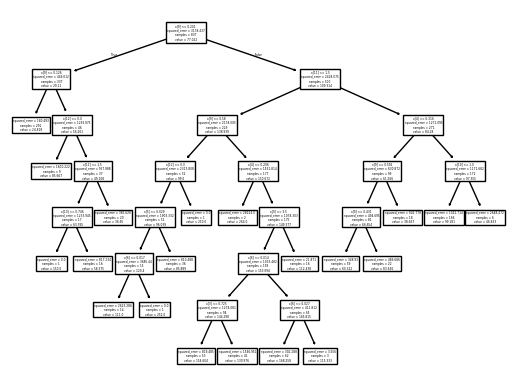

In [64]:
dtr = rsr.best_estimator_

dtr.fit(X_train, y_train)

tree.plot_tree(dtr)
plt.show()

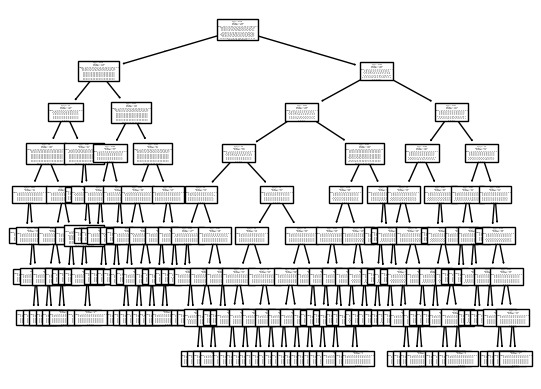

In [65]:
dtc = rsc.best_estimator_

dtc.fit(X_train, y_train)

tree.plot_tree(dtc)
plt.show()

In [66]:
describe_tree(dtr)

The binary tree structure has 39 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 9] <= 0.20114942640066147 else to node 2.
	node=1 is a split node: go to node 9 if X[:, 9] <= 0.1264367811381817 else to node 10.
	node=2 is a split node: go to node 3 if X[:, 11] <= 1.5 else to node 4.
		node=3 is a split node: go to node 5 if X[:, 9] <= 0.5804597735404968 else to node 6.
		node=4 is a split node: go to node 7 if X[:, 4] <= 0.3162020891904831 else to node 8.
			node=5 is a split node: go to node 15 if X[:, 12] <= 6.5680895204423e-05 else to node 16.
			node=6 is a split node: go to node 11 if X[:, 4] <= 0.20644599199295044 else to node 12.
			node=7 is a split node: go to node 27 if X[:, 9] <= 0.5919540226459503 else to node 28.
			node=8 is a split node: go to node 19 if X[:, 10] <= 1.000287652015686 else to node 20.
		node=9 is a leaf node, values: [[24.81786942]].
		node=10 is a split node: go to node 29 if X[:, 12] <= 3.198246213287348e-05 els

In [ ]:
describe_tree(dtc)

In [ ]:
predictions_train_r = dtr.predict(X_train)
predictions_train_c = dtc.predict(X_train)

print("MSE: ", compute_mse(predictions_train_r, y_train))
print("MSE: ", compute_mse(predictions_train_c, y_train))
pred = np.add(predictions_train_r, predictions_train_c)/2
print("MSE: ", compute_mse(predictions_train_c, y_train))

predictions_train_df = pd.DataFrame({'true' : y_train, 'pred_r' : predictions_train_r, 'pred_c' : predictions_train_c, 'pred' : pred})
predictions_train_df

MSE:  673.7117282385311
MSE:  1134.9976105137396
MSE:  699.8124324815595


,true,pred_r,pred_c,pred
0,104.0,83.636364,104.0,93.818182
1,171.0,168.258065,171.0,169.629032
2,177.0,168.258065,177.0,172.629032
3,171.0,154.603774,171.0,162.801887
4,116.0,99.180723,116.0,107.590361
...,...,...,...,...
832,114.0,99.180723,114.0,106.590361
833,116.0,99.180723,116.0,107.590361
834,76.0,83.636364,96.0,89.818182
835,112.0,99.180723,112.0,105.590361


In [72]:
predictions_test_r = dtr.predict(X_test)
predictions_test_c = dtc.predict(X_test)

print("MSE: ", compute_mse(predictions_test_r, y_test))
print("MSE: ", compute_mse(predictions_test_c, y_test))
pred = np.add(predictions_test_r, predictions_test_c)/2
print("MSE: ", compute_mse(pred, y_test))

predictions_test_df = pd.DataFrame({'true' : y_test, 'pred_r' : predictions_test_r, 'pred_c' : predictions_test_c, 'pred' : pred})
predictions_test_df

MSE:  1017.9314983602159
MSE:  1572.5222222222221
MSE:  954.0554660209555


,true,pred_r,pred_c,pred
0,68.0,60.322034,68.0,64.161017
1,44.0,60.322034,44.0,52.161017
2,30.0,24.817869,30.0,27.408935
3,16.0,24.817869,16.0,20.408935
4,38.0,38.666667,110.0,74.333333
...,...,...,...,...
355,171.0,168.258065,114.0,141.129032
356,116.0,168.258065,116.0,142.129032
357,85.0,154.603774,171.0,162.801887
358,114.0,115.333333,114.0,114.666667
